### EDA Case Study 
The given dataset consists of data related to ride-sharing service costs, encompassing various factors that could influence the dynamic pricing model of rides.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff

# Optional: To display plots inline in a notebook
%matplotlib inline

In [6]:
df=pd.read_csv('./Ride Sharing Case Study/dynamic_pricing.csv')

In [7]:
df.head(10)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
5,59,35,Urban,Silver,83,3.51,Night,Economy,128,339.955361
6,93,43,Suburban,Regular,44,4.41,Afternoon,Premium,16,104.061541
7,62,39,Rural,Gold,83,3.59,Afternoon,Premium,47,235.811864
8,79,14,Rural,Silver,71,3.74,Evening,Economy,128,501.412517
9,42,6,Rural,Silver,21,3.85,Night,Premium,128,398.993365


In [8]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [9]:
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [15]:
df.head(10)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
5,59,35,Urban,Silver,83,3.51,Night,Economy,128,339.955361
6,93,43,Suburban,Regular,44,4.41,Afternoon,Premium,16,104.061541
7,62,39,Rural,Gold,83,3.59,Afternoon,Premium,47,235.811864
8,79,14,Rural,Silver,71,3.74,Evening,Economy,128,501.412517
9,42,6,Rural,Silver,21,3.85,Night,Premium,128,398.993365


In [10]:
#Handling missing values

df.isnull().any()

Number_of_Riders           False
Number_of_Drivers          False
Location_Category          False
Customer_Loyalty_Status    False
Number_of_Past_Rides       False
Average_Ratings            False
Time_of_Booking            False
Vehicle_Type               False
Expected_Ride_Duration     False
Historical_Cost_of_Ride    False
dtype: bool

In [11]:
df.isna().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [12]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [22]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [23]:
# bar plots for categorical variables

df.nunique()

Number_of_Riders             81
Number_of_Drivers            79
Location_Category             3
Customer_Loyalty_Status       3
Number_of_Past_Rides        101
Average_Ratings             151
Time_of_Booking               4
Vehicle_Type                  2
Expected_Ride_Duration      171
Historical_Cost_of_Ride    1000
dtype: int64

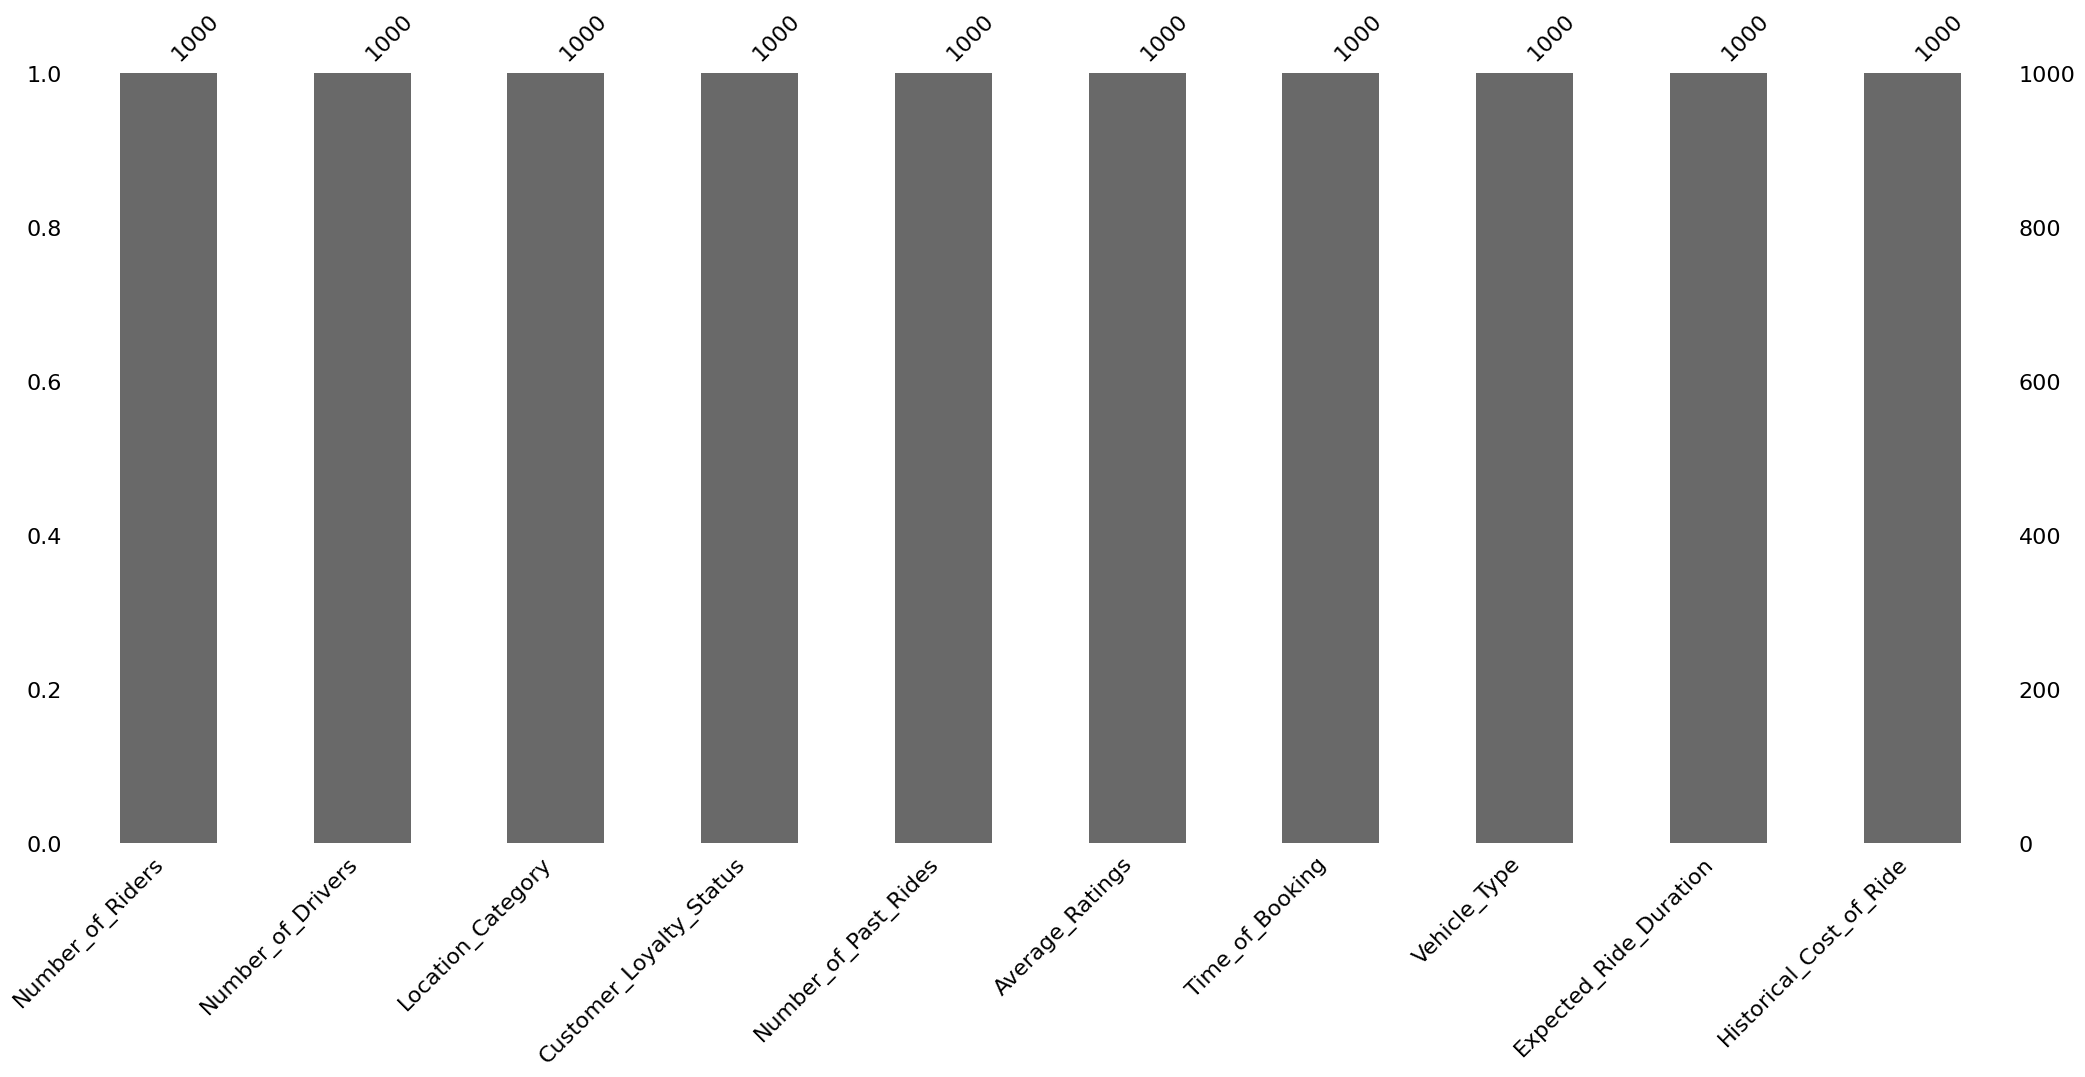

In [33]:
bar=msno.bar(df)

In [34]:
df.duplicated().sum()

0

In [37]:
df['Number_of_Riders'].nunique()

81

In [40]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64

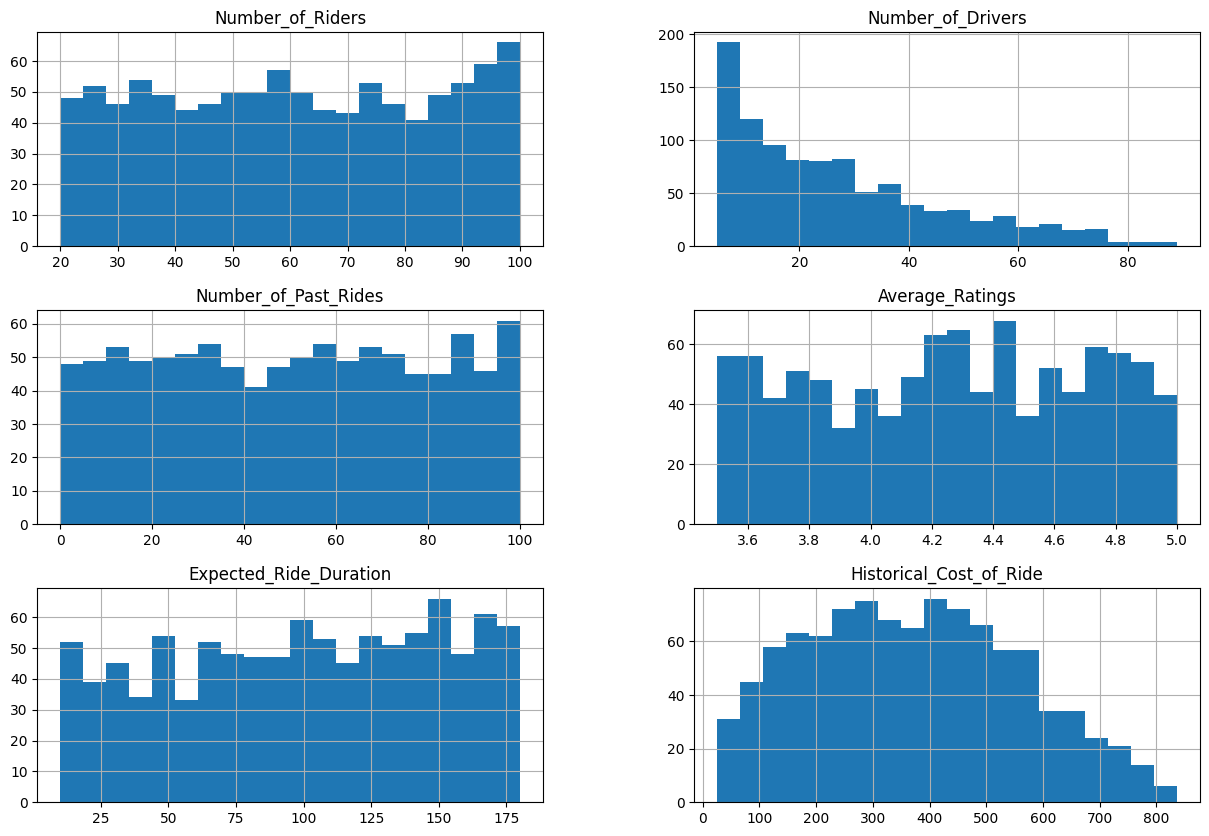

In [44]:
# Plot histograms for numerical features
df.hist(bins=20, figsize=(15, 10))
plt.show()

In [47]:
# Summary of categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking',
       'Vehicle_Type'],
      dtype='object')


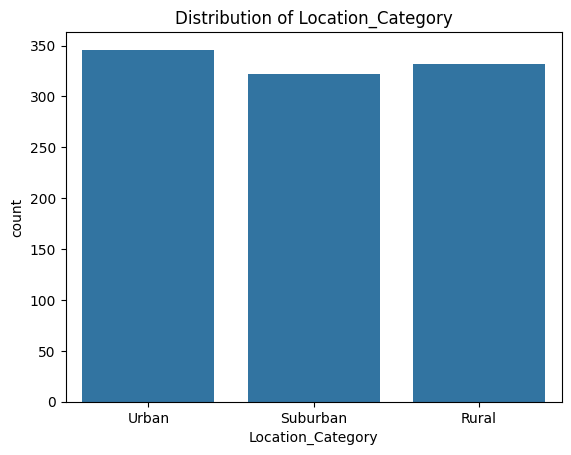

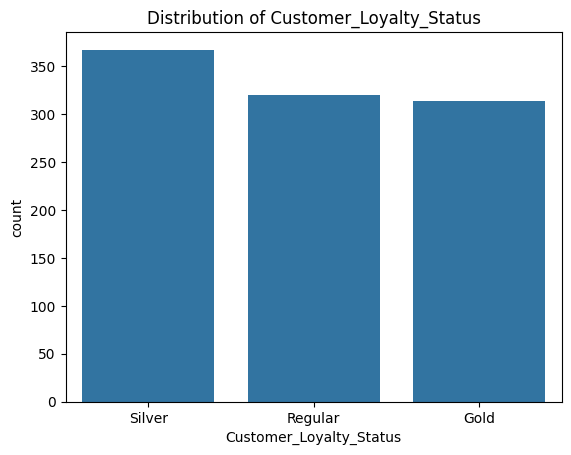

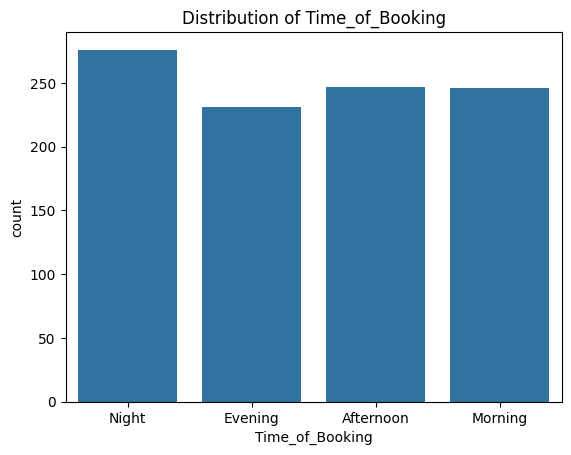

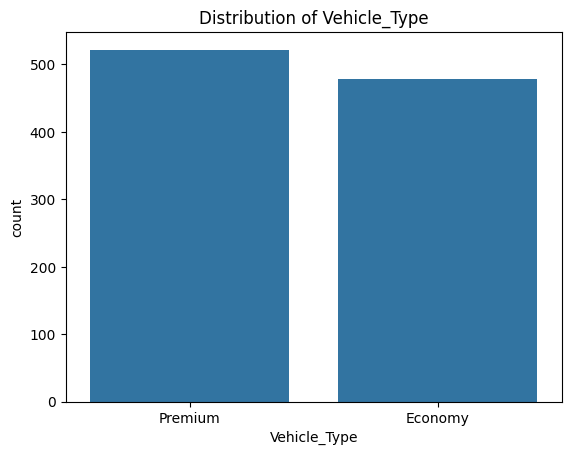

In [45]:
#bar charts to visualize the categorical data.

for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

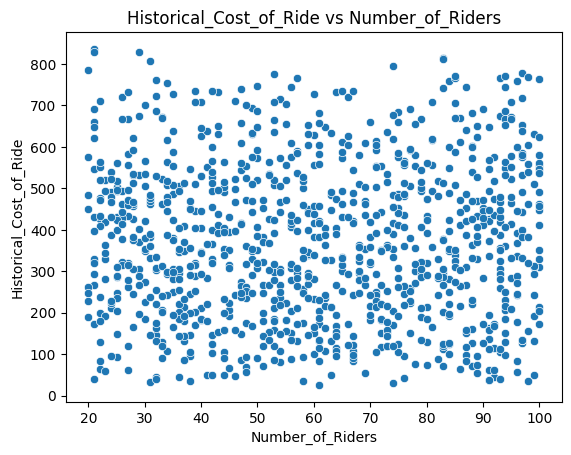

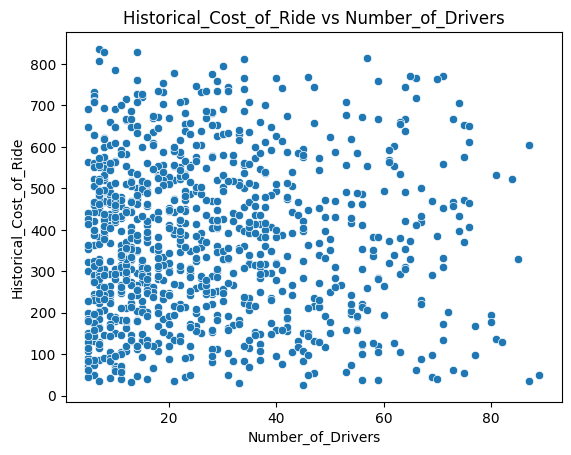

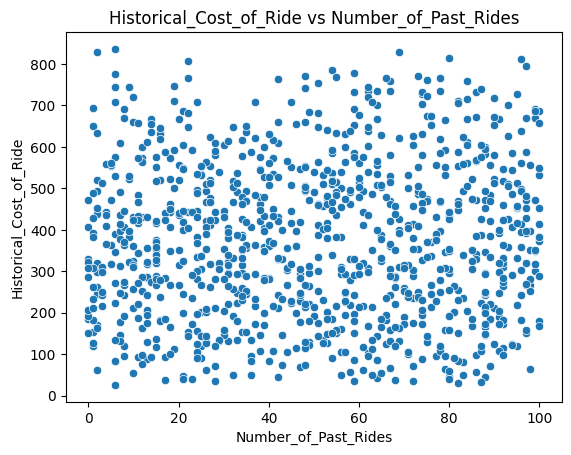

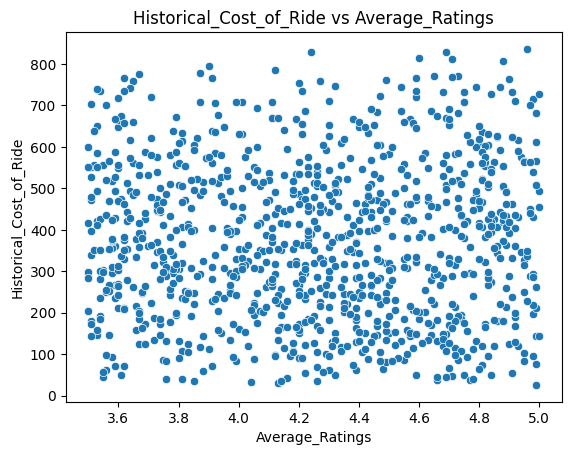

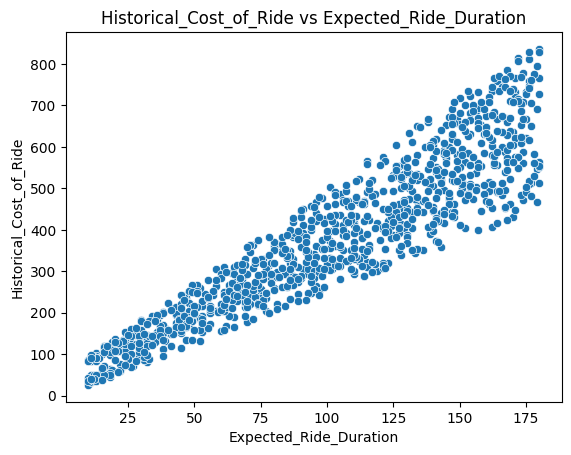

In [48]:
# Scatter plot for numeric features

for feature in df.select_dtypes(include=[np.number]).columns:
    if feature!= 'Historical_Cost_of_Ride':
        sns.scatterplot(x=feature,y='Historical_Cost_of_Ride',data=df)
        plt.title(f'Historical_Cost_of_Ride vs {feature}')
        plt.show()

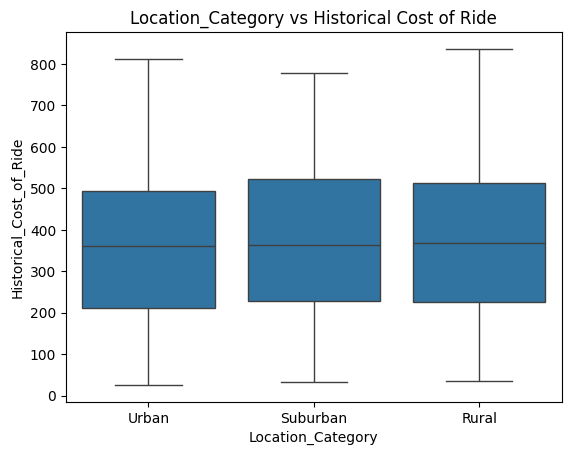

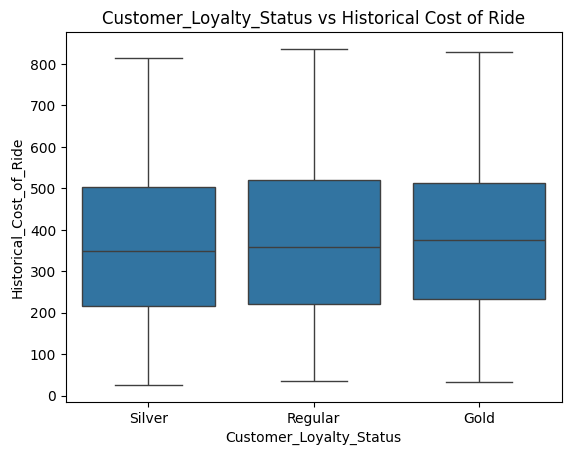

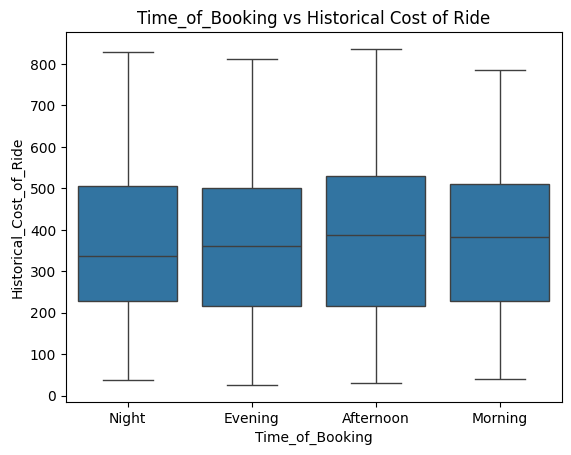

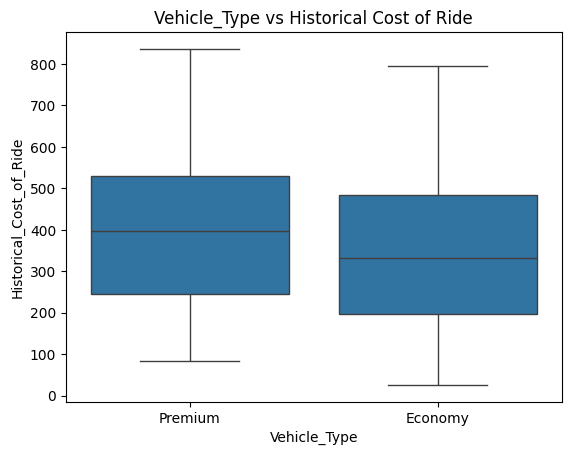

In [50]:
# Boxplots for categorical features
for feature in df.select_dtypes(include=[object]).columns:
        sns.boxplot(x=feature, y='Historical_Cost_of_Ride', data=df)
        plt.title(f'{feature} vs Historical Cost of Ride')
        plt.show()

As per my analysis, Vehicle_Type and Expected_Ride_Duration aare the two most important features that can affect the future Cost of Ride. My detail analysis is as below:

__1. Vehical_Type:__ The box plot comparing Vehicle_Type with Historical_Cost_of_Ride shows a clear difference in median ride costs between Premium and Economy vehicles. Premium vehicles generally have higher ride costs, which makes sense as they offer higher-end services.
    __Feature Importance:__ This distinction suggests that Vehicle_Type is an important feature for predicting the cost of a ride. The consistent difference in cost between vehicle types indicates that this feature has a significant impact on the target variable (Historical_Cost_of_Ride).

__2. Expected_Ride_Duration:__ We can see from the scatterplot that there is a positive correlation between Ride Duration and Cost. Typically, longer rides tend to cost more due to the additional time and distance traveled.
    __Feature Importance:__  Given this logical connection, Expected_Ride_Duration is likely a crucial feature for predicting the Historical_Cost_of_Ride. It directly influences the fare structure, making it a strong candidate for inclusion in any predictive model.
    


